In [1]:
import numpy as np
import pandas as pd

wine_red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

wine_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
# quality 값을 0 또는 1로 변환 (이진화)
# quality가 5보다 크다면 1, 아니면 0
binary_data = wine_red.copy()
binary_data['quality'] = binary_data['quality'].apply(lambda x: 1 if x>5 else 0)
binary_data.quality.value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [3]:
# X: fixed acidity부터 alcohol
# y: 이진화한 quality
X = binary_data.iloc[:, :-1]
y = binary_data.iloc[:, -1]

In [4]:
# 데이터를 train set과 test set으로 나눔
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1199, 11) (1199,)
(400, 11) (400,)


In [5]:
# standard scaler를 사용하여 scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
# scikit-learn의 kNN classifier 모델을 사용하여 학습 및 예측
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=5, )
kNN.fit(x_train, y_train)
y_pred = kNN.predict(x_test)

In [10]:
# 저번 실습과 마찬가지로 accuracy, recall, precision, f1 score 사용해서 성능 측정
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test)
confusion_mtx = confusion_matrix(y_pred, y_test)

print(f"accuracy: {accuracy}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1_score: {f1_score}\n")
print("confusion matrix")
print(confusion_mtx)

accuracy: 0.72
recall: 0.7511111111111111
precision: 0.7511111111111111
f1_score: 0.7511111111111111

confusion matrix
[[119  56]
 [ 56 169]]


Text(50.722222222222214, 0.5, 'true')

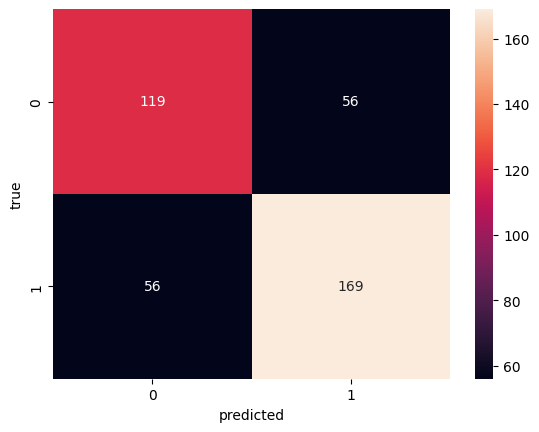

In [8]:
import seaborn as sb

fig = sb.heatmap(confusion_mtx, annot=True, fmt=".0f")
fig.set_xlabel('predicted')
fig.set_ylabel('true')

# Homework

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

data_digits = load_digits()
X = data_digits.data
y = data_digits.target

print(X.shape, y.shape)

(1797, 64) (1797,)


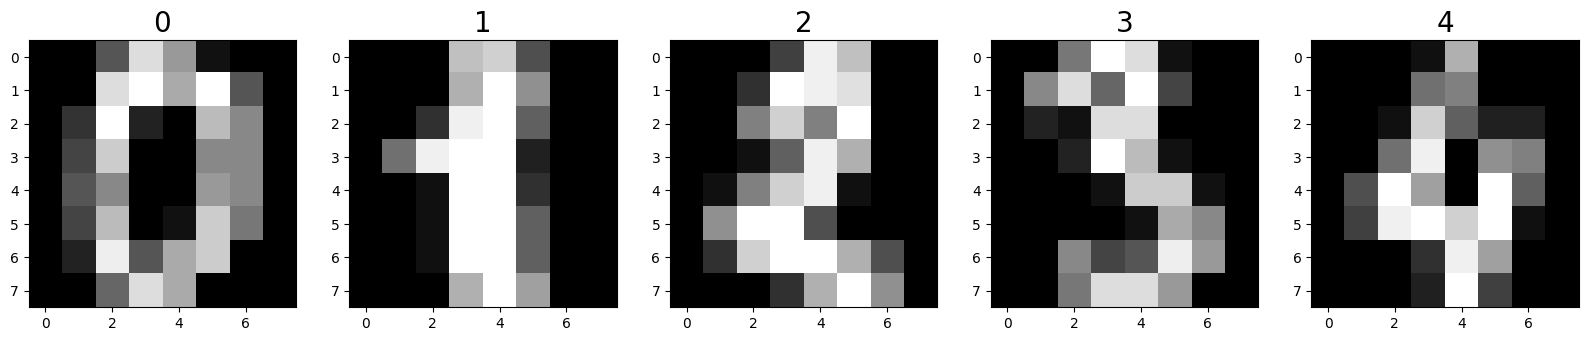

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(data_digits.data[0:5], 
                                           data_digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(label, fontsize = 20);

### 여기서부터 과제
### kNN classifier의 n_neighbors 값을 3번 이상 바꿔가며 결과 출력

In [18]:
# 데이터를 train set과 test set으로 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


In [28]:
# scikit-learn의 kNN classifier 모델을 사용하여 학습 및 예측
# n_neighbors 값은 자유롭게 설정
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=3, )
kNN.fit(x_train, y_train)
y_pred = kNN.predict(x_test)

In [29]:
# accuracy와 f1_score 및 confusion_matrix 계산하여 출력
# f1_socre은 average='micro'로 설정
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test, average='micro')
confusion_mtx = confusion_matrix(y_pred, y_test)

print(f"accuracy: {accuracy}")
print(f"f1_score: {f1_score}\n")
print(confusion_mtx)

accuracy: 0.9844444444444445
f1_score: 0.9844444444444445

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  2  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  1  0 50  0  0  0  0]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  1  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0  0  1 41]]


Text(50.722222222222214, 0.5, 'true')

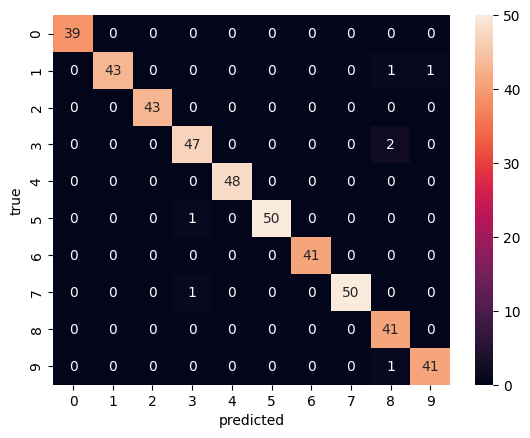

In [30]:
# seaborn 라이브러리 사용해서 confusion matrix를 heatmap으로 찍어보기
import seaborn as sb

fig = sb.heatmap(confusion_mtx, annot=True, fmt=".0f")
fig.set_xlabel('predicted')
fig.set_ylabel('true')

In [31]:
# scikit-learn의 kNN classifier 모델을 사용하여 학습 및 예측
# n_neighbors 값은 자유롭게 설정
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=8, )
kNN.fit(x_train, y_train)
y_pred = kNN.predict(x_test)

In [32]:
# accyracy와 f1_score 및 confusion_matrix 계산하여 출력
# f1_socre은 average='micro'로 설정
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test, average='micro')
confusion_mtx = confusion_matrix(y_pred, y_test)

print(f"accuracy: {accuracy}")
print(f"f1_score: {f1_score}\n")
print(confusion_mtx)

accuracy: 0.9755555555555555
f1_score: 0.9755555555555555

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  1  0  3  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  2  0]
 [ 0  0  0  0 47  1  0  0  0  0]
 [ 0  0  0  1  0 49  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  1  1  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  0 41]]


Text(50.722222222222214, 0.5, 'true')

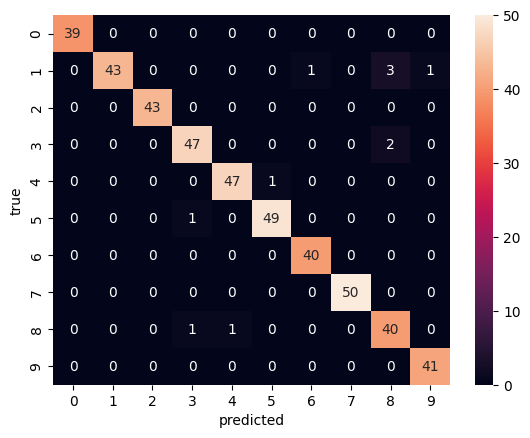

In [33]:
# seaborn 라이브러리 사용해서 confusion matrix를 heatmap으로 찍어보기
import seaborn as sb

fig = sb.heatmap(confusion_mtx, annot=True, fmt=".0f")
fig.set_xlabel('predicted')
fig.set_ylabel('true')

In [40]:
# scikit-learn의 kNN classifier 모델을 사용하여 학습 및 예측
# n_neighbors 값은 자유롭게 설정
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=12, )
kNN.fit(x_train, y_train)
y_pred = kNN.predict(x_test)

In [41]:
# accyracy와 f1_score 및 confusion_matrix 계산하여 출력
# f1_socre은 average='micro'로 설정
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test, average='micro')
confusion_mtx = confusion_matrix(y_pred, y_test)

print(f"accuracy: {accuracy}")
print(f"f1_score: {f1_score}\n")
print(confusion_mtx)

accuracy: 0.9733333333333334
f1_score: 0.9733333333333334

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  1  0  3  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  2  0]
 [ 0  0  0  0 47  1  0  0  0  0]
 [ 0  0  0  1  0 49  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  1]
 [ 0  0  0  1  1  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  0 40]]


Text(50.722222222222214, 0.5, 'true')

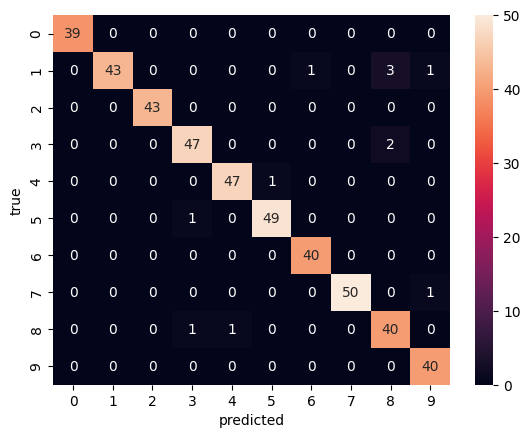

In [42]:
# seaborn 라이브러리 사용해서 confusion matrix를 heatmap으로 찍어보기
import seaborn as sb

fig = sb.heatmap(confusion_mtx, annot=True, fmt=".0f")
fig.set_xlabel('predicted')
fig.set_ylabel('true')